In [1]:
import numpy as np
import pandas as pd

# Step 1: Set a random seed for reproducibility
np.random.seed(42)

# Step 2: Define parameters
n_samples = 500      # number of data points
n_features = 7       # number of features

# Step 3: Create a covariance matrix to make features correlated
base_corr = 0.9
cov = np.full((n_features, n_features), base_corr)
np.fill_diagonal(cov, 1.0)  # diagonal = 1 (self-correlation)

# Step 4: Generate multivariate normal data (highly correlated)
mean = np.zeros(n_features)
X = np.random.multivariate_normal(mean, cov, size=n_samples)

# Step 5: Define true coefficients and bias
true_weights = np.array([2.5, -1.8, 1.2, 0.8, 0.5, 1.5, -0.7])
bias = 3.0

# Step 6: Generate target variable with some noise They define how the target variable (y) 
#is generated from your features (X) using a linear relationship + randomness
noise = np.random.normal(0, 1.5, size=n_samples)
y = X.dot(true_weights) + bias + noise

# Step 7: Create DataFrame
columns = [f'Feature_{i+1}' for i in range(n_features)]
df = pd.DataFrame(X, columns=columns)
df['Target'] = y

# Step 8: Display correlation matrix
print("Feature Correlation Matrix:")
print(df.corr())

# Step 9: Save dataset
df.to_csv("highly_correlated_dataset.csv", index=False)
print("\nDataset saved as 'highly_correlated_dataset.csv'")


Feature Correlation Matrix:
           Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
Feature_1   1.000000   0.897925   0.899279   0.895184   0.894056   0.894905   
Feature_2   0.897925   1.000000   0.904170   0.914528   0.902848   0.916318   
Feature_3   0.899279   0.904170   1.000000   0.906929   0.890779   0.892586   
Feature_4   0.895184   0.914528   0.906929   1.000000   0.902122   0.895103   
Feature_5   0.894056   0.902848   0.890779   0.902122   1.000000   0.889743   
Feature_6   0.894905   0.916318   0.892586   0.895103   0.889743   1.000000   
Feature_7   0.903157   0.907611   0.905746   0.902690   0.903508   0.895431   
Target      0.903654   0.807414   0.869086   0.854551   0.850811   0.871616   

           Feature_7    Target  
Feature_1   0.903157  0.903654  
Feature_2   0.907611  0.807414  
Feature_3   0.905746  0.869086  
Feature_4   0.902690  0.854551  
Feature_5   0.903508  0.850811  
Feature_6   0.895431  0.871616  
Feature_7   1.000000  0.82968

In [5]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-12.0.0-cp312-cp312-win_amd64.whl.metadata (9.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 4.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.1 MB 4.2 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.1 MB 4.6 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 4.3 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 4.1 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 4.2 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 4.4 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.4 MB/s  0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta

Dataset saved to highly_correlated_dataset.csv

Cross-validation results (sorted by val_r2_mean):
   lambda  train_r2_mean  train_r2_std  val_r2_mean  val_r2_std
 1.000000       0.871212      0.005668     0.861457    0.024009
 0.001000       0.871264      0.005668     0.861420    0.024026
 0.000010       0.871264      0.005668     0.861420    0.024026
 0.000000       0.871264      0.005668     0.861420    0.024026
 0.000000       0.871264      0.005668     0.861420    0.024026
 0.000000       0.871264      0.005668     0.861420    0.024026
10.000000       0.867974      0.005699     0.858637    0.024273
20.000000       0.862375      0.005779     0.853140    0.024901

Best lambda by CV: 1.0
iter 0, cost 8.935468
iter 200, cost 1.184928
iter 400, cost 1.170552
iter 600, cost 1.170119
iter 800, cost 1.170103
iter 1000, cost 1.170103
iter 1200, cost 1.170103

Full-data R2: GD = 0.870775, Closed-form = 0.870775


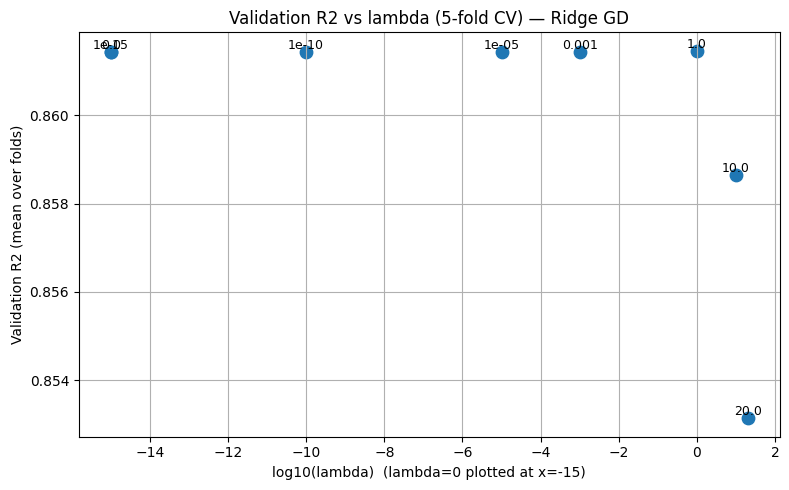

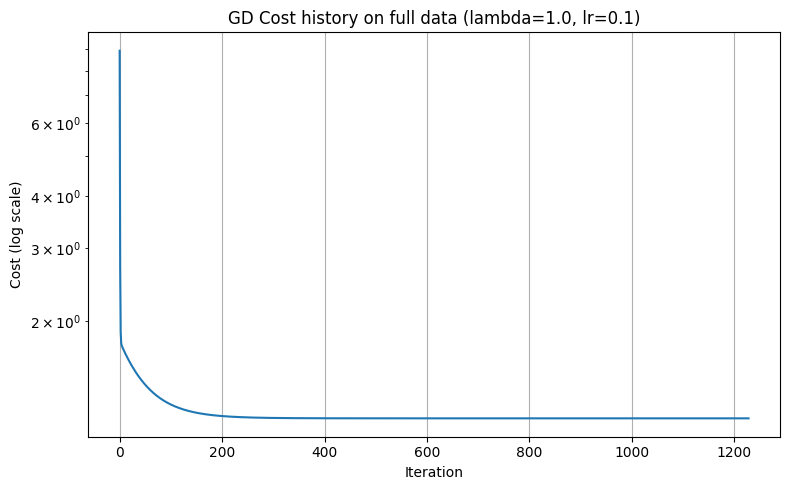


Saved ridge_gd_cv_results.csv and ridge_gd_best_weights.txt


In [6]:
"""
ridge_gd_cv.py

Performs k-fold cross-validation over lambda values using Ridge Regression
trained by Gradient Descent (your implementation). Compares to closed-form
Ridge solution from linear algebra (analytic), and plots training vs validation R2.

Dependencies:
- numpy
- pandas
- matplotlib
- scikit-learn

Run: python ridge_gd_cv.py
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from numpy.linalg import inv

# ----------------------------
# Dataset generation (your code)
# ----------------------------
np.random.seed(42)

n_samples = 500
n_features = 7
base_corr = 0.9
cov = np.full((n_features, n_features), base_corr)
np.fill_diagonal(cov, 1.0)
mean = np.zeros(n_features)
X = np.random.multivariate_normal(mean, cov, size=n_samples)
true_weights = np.array([2.5, -1.8, 1.2, 0.8, 0.5, 1.5, -0.7])
bias = 3.0
noise = np.random.normal(0, 1.5, size=n_samples)
y = X.dot(true_weights) + bias + noise

columns = [f'Feature_{i+1}' for i in range(n_features)]
df = pd.DataFrame(X, columns=columns)
df['Target'] = y
df.to_csv("highly_correlated_dataset.csv", index=False)
print("Dataset saved to highly_correlated_dataset.csv")

# ----------------------------
# Standardize features & center y
# ----------------------------
X_raw = df[columns].values
y_raw = df['Target'].values
X_mean = X_raw.mean(axis=0)
X_std = X_raw.std(axis=0, ddof=0)
X_std[X_std == 0] = 1.0
X_stdized = (X_raw - X_mean) / X_std
y_mean = y_raw.mean()
y_centered = y_raw - y_mean

# ----------------------------
# Ridge via Gradient Descent
# ----------------------------
def ridge_gd(X, y, lr=0.01, lam=1.0, epochs=2000, tol=1e-9, verbose=False):
    """
    X: (n, d) standardized features
    y: (n,) centered target
    lr: learning rate
    lam: regularization parameter (lambda)
    Returns: weights (d,), bias (scalar), cost_history list
    """
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    cost_history = []
    prev_cost = np.inf

    for it in range(epochs):
        preds = X.dot(w) + b
        error = preds - y
        # cost = (1/(2n)) * sum(error^2) + (lam/(2n)) * sum(w^2)
        mse = (error**2).mean() / 2.0
        reg = (lam / (2.0 * n)) * np.sum(w**2)
        cost = mse + reg
        cost_history.append(cost)

        # gradients
        grad_w = (X.T.dot(error)) / n + (lam / n) * w
        grad_b = error.mean()

        # update
        w = w - lr * grad_w
        b = b - lr * grad_b

        if verbose and (it % 200 == 0):
            print(f"iter {it}, cost {cost:.6f}")

        if abs(prev_cost - cost) < tol:
            break
        prev_cost = cost

        # guard
        if not np.isfinite(cost):
            break

    # convert bias back to original target scale: predictions were for centered y;
    # full_bias = b + y_mean
    return w, b, cost_history

# ----------------------------
# Closed-form Ridge (analytic) on standardized features
# ----------------------------
def ridge_closed_form(X, y, lam):
    """
    X: (n,d) standardized features (no column of ones)
    y: (n,) centered target
    lam: regularization parameter
    returns weights and bias (bias in original target scale)
    """
    n, d = X.shape
    # Solve: w = (X^T X + lam * I)^(-1) X^T y
    A = X.T.dot(X) + lam * np.eye(d)
    w = inv(A).dot(X.T).dot(y)
    # bias computed to match centered y -> predictions center + y_mean
    b = 0.0
    return w, b

# ----------------------------
# Hyperparameters and CV
# ----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lambdas = [1e-15, 1e-10, 1e-5, 1e-3, 0.0, 1.0, 10.0, 20.0]
learning_rate = 0.1           # pick the lr that worked well earlier, but we will try sensitivity below
epochs = 2000

cv_results = []
detailed_histories = {}  # store training & val R2 per epoch for the best lambda to plot convergence if desired

for lam in lambdas:
    train_r2_scores = []
    val_r2_scores = []
    fold_idx = 0

    for train_idx, val_idx in kf.split(X_stdized):
        X_train, X_val = X_stdized[train_idx], X_stdized[val_idx]
        y_train, y_val = y_centered[train_idx], y_centered[val_idx]  # centered

        # Train using gradient descent
        w, b_cent, cost_hist = ridge_gd(X_train, y_train, lr=learning_rate, lam=lam, epochs=epochs, tol=1e-9, verbose=False)

        # Predictions on train and val (remember to add y_mean back for original targets)
        preds_train = X_train.dot(w) + b_cent + y_mean
        preds_val = X_val.dot(w) + b_cent + y_mean

        # compute R2 on original target scale
        r2_train = r2_score(y_raw[train_idx], preds_train)
        r2_val = r2_score(y_raw[val_idx], preds_val)

        train_r2_scores.append(r2_train)
        val_r2_scores.append(r2_val)

        # Save epoch-wise history for the first fold and first lambda as example
        if fold_idx == 0 and lam == lambdas[0]:
            # compute epoch-wise R2 arrays (on the first fold) for plotting
            # small helper: compute r2 after each epoch using interim weights
            # We'll recompute with a slightly modified GD that returns weights history if needed.
            pass

        fold_idx += 1

    mean_train_r2 = np.mean(train_r2_scores)
    std_train_r2 = np.std(train_r2_scores)
    mean_val_r2 = np.mean(val_r2_scores)
    std_val_r2 = np.std(val_r2_scores)

    cv_results.append({
        "lambda": lam,
        "train_r2_mean": mean_train_r2,
        "train_r2_std": std_train_r2,
        "val_r2_mean": mean_val_r2,
        "val_r2_std": std_val_r2
    })

results_df = pd.DataFrame(cv_results)
results_df = results_df.sort_values(by="val_r2_mean", ascending=False).reset_index(drop=True)
print("\nCross-validation results (sorted by val_r2_mean):")
print(results_df.to_string(index=False))

# ----------------------------
# Compare to closed-form ridge (trained on full train set) for the best lambda
# ----------------------------
best_lambda = float(results_df.loc[0, "lambda"])
print(f"\nBest lambda by CV: {best_lambda}")

# Train GD on full set with best lambda
w_best_gd, b_best_cent, cost_hist_best = ridge_gd(X_stdized, y_centered, lr=learning_rate, lam=best_lambda, epochs=5000, tol=1e-11, verbose=True)
preds_gd_full = X_stdized.dot(w_best_gd) + b_best_cent + y_mean
r2_gd_full = r2_score(y_raw, preds_gd_full)

# Closed-form
w_closed, b_closed_cent = ridge_closed_form(X_stdized, y_centered, lam=best_lambda)
preds_closed_full = X_stdized.dot(w_closed) + b_closed_cent + y_mean
r2_closed_full = r2_score(y_raw, preds_closed_full)

print(f"\nFull-data R2: GD = {r2_gd_full:.6f}, Closed-form = {r2_closed_full:.6f}")

# ----------------------------
# Plot CV summary: validation R2 vs lambda
# ----------------------------
plt.figure(figsize=(8,5))
# lambdas are not ordered naturally; transform to log scale but handle zero / very small
lambda_labels = [str(l) for l in lambdas]

# convert lambdas for x-axis: if zero, plot at a small negative value for visibility
x_vals = []
for lam in lambdas:
    if lam <= 0:
        x_vals.append(-15)  # place lambda=0 at left
    else:
        x_vals.append(np.log10(lam))

val_means = results_df["val_r2_mean"].values
# match order of x_vals with results_df order
# we must map each lambda in results_df back to its log-value
log_map = {lam: (-15 if lam <= 0 else np.log10(lam)) for lam in lambdas}
x_ordered = [log_map[lam] for lam in results_df["lambda"].tolist()]

plt.scatter(x_ordered, results_df["val_r2_mean"], s=80)
for xi, yi, lam in zip(x_ordered, results_df["val_r2_mean"], results_df["lambda"]):
    plt.text(xi, yi, f"{lam}", fontsize=9, va='bottom', ha='center')

plt.xlabel("log10(lambda)  (lambda=0 plotted at x=-15)")
plt.ylabel("Validation R2 (mean over folds)")
plt.title("Validation R2 vs lambda (5-fold CV) — Ridge GD")
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# Optional: Plot cost history for the best GD run (on full data)
# ----------------------------
plt.figure(figsize=(8,5))
plt.plot(cost_hist_best)
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Cost (log scale)")
plt.title(f"GD Cost history on full data (lambda={best_lambda}, lr={learning_rate})")
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# Save results
# ----------------------------
results_df.to_csv("ridge_gd_cv_results.csv", index=False)
np.savetxt("ridge_gd_best_weights.txt", np.concatenate([w_best_gd, np.array([b_best_cent + y_mean])]))
print("\nSaved ridge_gd_cv_results.csv and ridge_gd_best_weights.txt")


Loaded data via fetch_openml('boston') fallback
Dataset shape: X=(506, 13), y=(506,)

RidgeCV chosen alpha: 1.9953e+00
Ridge Test R2: 0.6682, RMSE: 4.9330

LassoCV chosen alpha: 1.0000e-06
Lasso Test R2: 0.6688, RMSE: 4.9286

Summary:
  model  best_alpha  test_R2  test_RMSE
RidgeCV    1.995262 0.668167   4.933006
LassoCV    0.000001 0.668759   4.928603


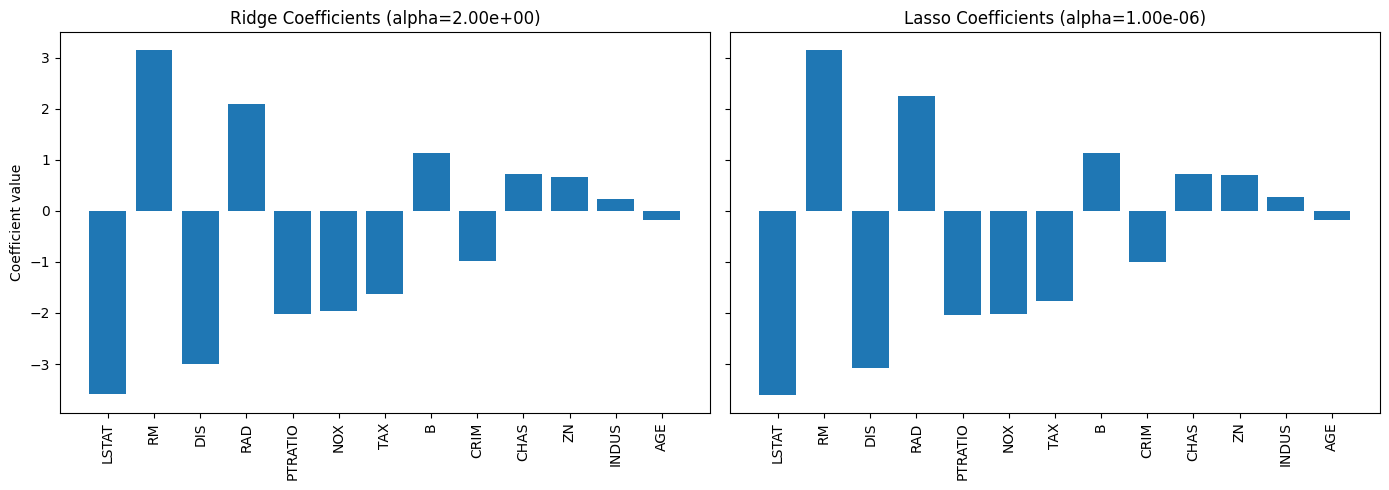


Lasso kept 13 non-zero coefficients out of 13 features:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

Saved summary to 'ridge_lasso_cv_summary.csv'


In [9]:
"""
ridge_lasso_cv_boston.py

Runs RidgeCV and LassoCV on the Boston housing dataset (with a fallback
if sklearn.datasets.load_boston is not available).
"""

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import RidgeCV


# Attempt to load the (deprecated) load_boston dataset; fallback to fetch_openml
try:
    from sklearn.datasets import load_boston
    boston = load_boston()
    X = boston.data
    y = boston.target
    feature_names = boston.feature_names
    print("Loaded data via sklearn.datasets.load_boston()")
except Exception:
    # fallback: fetch from openml
    from sklearn.datasets import fetch_openml
    boston = fetch_openml(name="boston", version=1, as_frame=True)
    df = boston.frame
    # target column may be "MEDV"
    y = df["MEDV"].values
    X = df.drop(columns=["MEDV"]).values
    feature_names = df.drop(columns=["MEDV"]).columns.to_numpy()
    print("Loaded data via fetch_openml('boston') fallback")

print(f"Dataset shape: X={X.shape}, y={y.shape}")

# Train/test split
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
)

# Candidate alphas (regularization strengths) to search
alphas = np.logspace(-6, 6, 41)  # from 1e-6 to 1e6

# -------------------------
# RidgeCV (built-in CV)
# -------------------------


# We'll standardize features inside a pipeline to ensure fair coef scaling
ridge_pipeline = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=alphas, cv=5)  # ← removed store_cv_values=True
)

ridge_pipeline.fit(X_train, y_train)
ridge_model = ridge_pipeline.named_steps['ridgecv']
best_alpha_ridge = ridge_model.alpha_
print(f"\nRidgeCV chosen alpha: {best_alpha_ridge:.4e}")

# Evaluate on test set
y_pred_ridge = ridge_pipeline.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Ridge Test R2: {r2_ridge:.4f}, RMSE: {rmse_ridge:.4f}")


# Coefficients (map back to feature names)
scaler = ridge_pipeline.named_steps['standardscaler']
coef_ridge = ridge_model.coef_  # these are coefficients for standardized features

# -------------------------
# LassoCV (built-in CV)
# -------------------------
from sklearn.linear_model import LassoCV

lasso_pipeline = make_pipeline(
    StandardScaler(),
    LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=RANDOM_SEED)
)

lasso_pipeline.fit(X_train, y_train)
lasso_model = lasso_pipeline.named_steps['lassocv']
best_alpha_lasso = lasso_model.alpha_
print(f"\nLassoCV chosen alpha: {best_alpha_lasso:.4e}")

# Evaluate on test set
y_pred_lasso = lasso_pipeline.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"Lasso Test R2: {r2_lasso:.4f}, RMSE: {rmse_lasso:.4f}")

coef_lasso = lasso_model.coef_

# -------------------------
# Summary table
# -------------------------
summary = pd.DataFrame({
    "model": ["RidgeCV", "LassoCV"],
    "best_alpha": [best_alpha_ridge, best_alpha_lasso],
    "test_R2": [r2_ridge, r2_lasso],
    "test_RMSE": [rmse_ridge, rmse_lasso]
})
print("\nSummary:")
print(summary.to_string(index=False))

# -------------------------
# Plot coefficient magnitudes
# -------------------------
fig, ax = plt.subplots(1, 2, figsize=(14,5), sharey=True)

# Prepare ordered features by magnitude (for nicer plotting)
order = np.argsort(np.abs(coef_ridge))[::-1]
ax[0].bar(np.arange(len(coef_ridge)), coef_ridge[order])
ax[0].set_xticks(np.arange(len(coef_ridge)))
ax[0].set_xticklabels(feature_names[order], rotation=90)
ax[0].set_title(f"Ridge Coefficients (alpha={best_alpha_ridge:.2e})")
ax[0].set_ylabel("Coefficient value")

order2 = np.argsort(np.abs(coef_lasso))[::-1]
ax[1].bar(np.arange(len(coef_lasso)), coef_lasso[order2])
ax[1].set_xticks(np.arange(len(coef_lasso)))
ax[1].set_xticklabels(feature_names[order2], rotation=90)
ax[1].set_title(f"Lasso Coefficients (alpha={best_alpha_lasso:.2e})")

plt.tight_layout()
plt.show()

# -------------------------
# Inspecting non-zero features for Lasso
# -------------------------
nonzero_idx = np.where(np.abs(coef_lasso) > 1e-8)[0]
print(f"\nLasso kept {len(nonzero_idx)} non-zero coefficients out of {len(coef_lasso)} features:")
print(feature_names[nonzero_idx])

# Optionally save results
summary.to_csv("ridge_lasso_cv_summary.csv", index=False)
print("\nSaved summary to 'ridge_lasso_cv_summary.csv'")
